In [11]:
from IPython.display import Image
import collections
import csv,re,sys,os
sys.path.append('/home/ubuntu/projects/tools/')
import gp_colours
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas.io import wb
import locale
import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
?sns.color_palette("Blues")

In [8]:
locale.setlocale(locale.LC_ALL, 'en_US.utf8')

def replaceThousands(n):
    '''Format large numbers'''
    return locale.format("%d",n, grouping=True)

In [9]:
sns.set_context('paper')

In [10]:
def setFigSize(dim=(16.5,5.5)):
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(dim[0],dim[1])

###Grab CAIDA AS Data

In [12]:
if not os.path.exists('../data'):
    os.mkdir('../data')

if not os.path.exists('../data/midar-iff.nodes.geo'):
    !wget http://data.caida.org/datasets/topology/ark/ipv4/itdk/2013-04/kapar-midar-iff.nodes.geo.gz && \
        gunzip ../data/midar-iff.nodes.geo.gz


In [13]:
if False:
    !grep -v '#' midar-iff.nodes.geo | awk -F '\t' '{print $1"\t"$3}' > midar-iff.nodes.geo_reduced


###Read in Geolocated AS Data

In [14]:
df=pd.read_csv('../data/midar-iff.nodes.geo_reduced',quotechar='#',delimiter='\t',header=False,names=['id','country'])

In [15]:
df.shape

(31788985, 2)

###Get Country Names and ISO Codes

In [21]:
iso=wb.get_countries()
# 'name','iso2c'
iso.incomeLevel=iso.incomeLevel.apply(lambda x: re.sub(r'High income: nonOECD|High income: OECD','High income',x))
# Collpase OECD and non OECD high income countries

In [22]:
iso.incomeLevel.value_counts()

High income            80
Upper middle income    53
Lower middle income    51
Aggregates             49
Low income             31
dtype: int64

In [24]:
isoHash={}

for r in iso.iterrows():
#    print r[1][4],r[1][8]
    isoHash[r[1][4]]=r[1][8]

In [25]:
df.head()

,id,country
0,node.geo N2:,SG
1,node.geo N3:,SG
2,node.geo N4:,SG
3,node.geo N5:,IL
4,node.geo N6:,FR


In [26]:
%%time
df['idClean']=df.id.apply(lambda x:re.sub('node.geo ','',x))
df['idClean']=df['idClean'].apply(lambda x:re.sub(':','',x))

CPU times: user 3min 7s, sys: 2.45 s, total: 3min 10s
Wall time: 3min 8s


In [27]:
df.head()

,id,country,idClean
0,node.geo N2:,SG,N2
1,node.geo N3:,SG,N3
2,node.geo N4:,SG,N4
3,node.geo N5:,IL,N5
4,node.geo N6:,FR,N6


###Clean out EU

In [63]:
df[df['country']=='EU']=None

In [12]:
nodeGeoHash=collections.OrderedDict()
# Node #X=>country Y

for r in df.iterrows():
#    print r[1][1],r[1][2]
    nodeGeoHash[r[1][2]]=r[1][1]
#    sys.exit(1)

In [13]:
levelHash={}

for r in iso.iterrows():
#    print r[1][8]
    print r[1][8],r[1][3]
    levelHash[r[1][8]]=r[1][3]

Aruba High income: nonOECD
Afghanistan Low income
Africa Aggregates
Angola Upper middle income
Albania Upper middle income
Andorra High income: nonOECD
Andean Region Aggregates
Arab World Aggregates
United Arab Emirates High income: nonOECD
Argentina High income: nonOECD
Armenia Lower middle income
American Samoa Upper middle income
Antigua and Barbuda High income: nonOECD
Australia High income: OECD
Austria High income: OECD
Azerbaijan Upper middle income
Burundi Low income
Belgium High income: OECD
Benin Low income
Burkina Faso Low income
Bangladesh Lower middle income
Bulgaria Upper middle income
Bahrain High income: nonOECD
Bahamas, The High income: nonOECD
Bosnia and Herzegovina Upper middle income
Belarus Upper middle income
Belize Upper middle income
Bermuda High income: nonOECD
Bolivia Lower middle income
Brazil Upper middle income
Barbados High income: nonOECD
Brunei Darussalam High income: nonOECD
Bhutan Lower middle income
Botswana Upper middle income
Sub-Saharan Africa (IFC

In [14]:
df['fullName']=df['country'].apply(lambda x:isoHash.get(x))
df['level']=df['country'].apply(lambda x:levelHash.get(x))

In [15]:
iso[iso.iso2c=='GB'].incomeLevel.values[0]

u'High income: OECD'

In [16]:
df.head()

,id,country,idClean,fullName,level
0,node.geo N2:,SG,N2,Singapore,None
1,node.geo N3:,SG,N3,Singapore,None
2,node.geo N4:,SG,N4,Singapore,None
3,node.geo N5:,IL,N5,Israel,None
4,node.geo N6:,FR,N6,France,None


In [17]:
df.idClean.values[0]

'N2'

In [18]:
levelValues=iso.incomeLevel.values
levels=iso.incomeLevel.unique()

In [19]:
iso.incomeLevel.value_counts()

Upper middle income     53
Lower middle income     51
Aggregates              49
High income: nonOECD    48
High income: OECD       32
Low income              31
dtype: int64

In [20]:
colourHash={}

colourHash[levels[0]]=gp_colours.gpBlue
colourHash[levels[1]]=gp_colours.gpBrown
colourHash[levels[2]]=gp_colours.gpPink
colourHash[levels[3]]=gp_colours.gpLightBlue
colourHash[levels[4]]=gp_colours.gpLightGray
colourHash[levels[5]]=gp_colours.gpBlue
# Collapse High income OECD/non-OECD together

In [21]:
print levels

[u'High income: nonOECD' u'Low income' u'Aggregates' u'Upper middle income'
 u'Lower middle income' u'High income: OECD']


In [22]:
counts=df.fullName.value_counts()

In [23]:
countsHash=counts.to_dict()

Sint Maarten (Dutch part) High income: nonOECD
Tuvalu Upper middle income
Korea, Dem. Rep. Low income
Guinea-Bissau Low income
Chad Low income
South Sudan Low income
Kiribati Lower middle income
Eritrea Low income
Central African Republic Low income
Suriname Upper middle income
Sao Tome and Principe Lower middle income
Somalia Low income
St. Martin (French part) High income: nonOECD
Comoros Low income
Liberia Low income
Turkmenistan Upper middle income
Sierra Leone Low income
Marshall Islands Upper middle income
Tonga Upper middle income
Burundi Low income
Palau Upper middle income
Myanmar Lower middle income
Timor-Leste Lower middle income
Ethiopia Low income
Solomon Islands Lower middle income
Guinea Low income
Turks and Caicos Islands High income: nonOECD
Djibouti Lower middle income
Togo Low income
Equatorial Guinea High income: nonOECD
American Samoa Upper middle income
Congo, Rep. Lower middle income
Niger Low income
Cabo Verde Lower middle income
Greenland High income: nonOECD
S

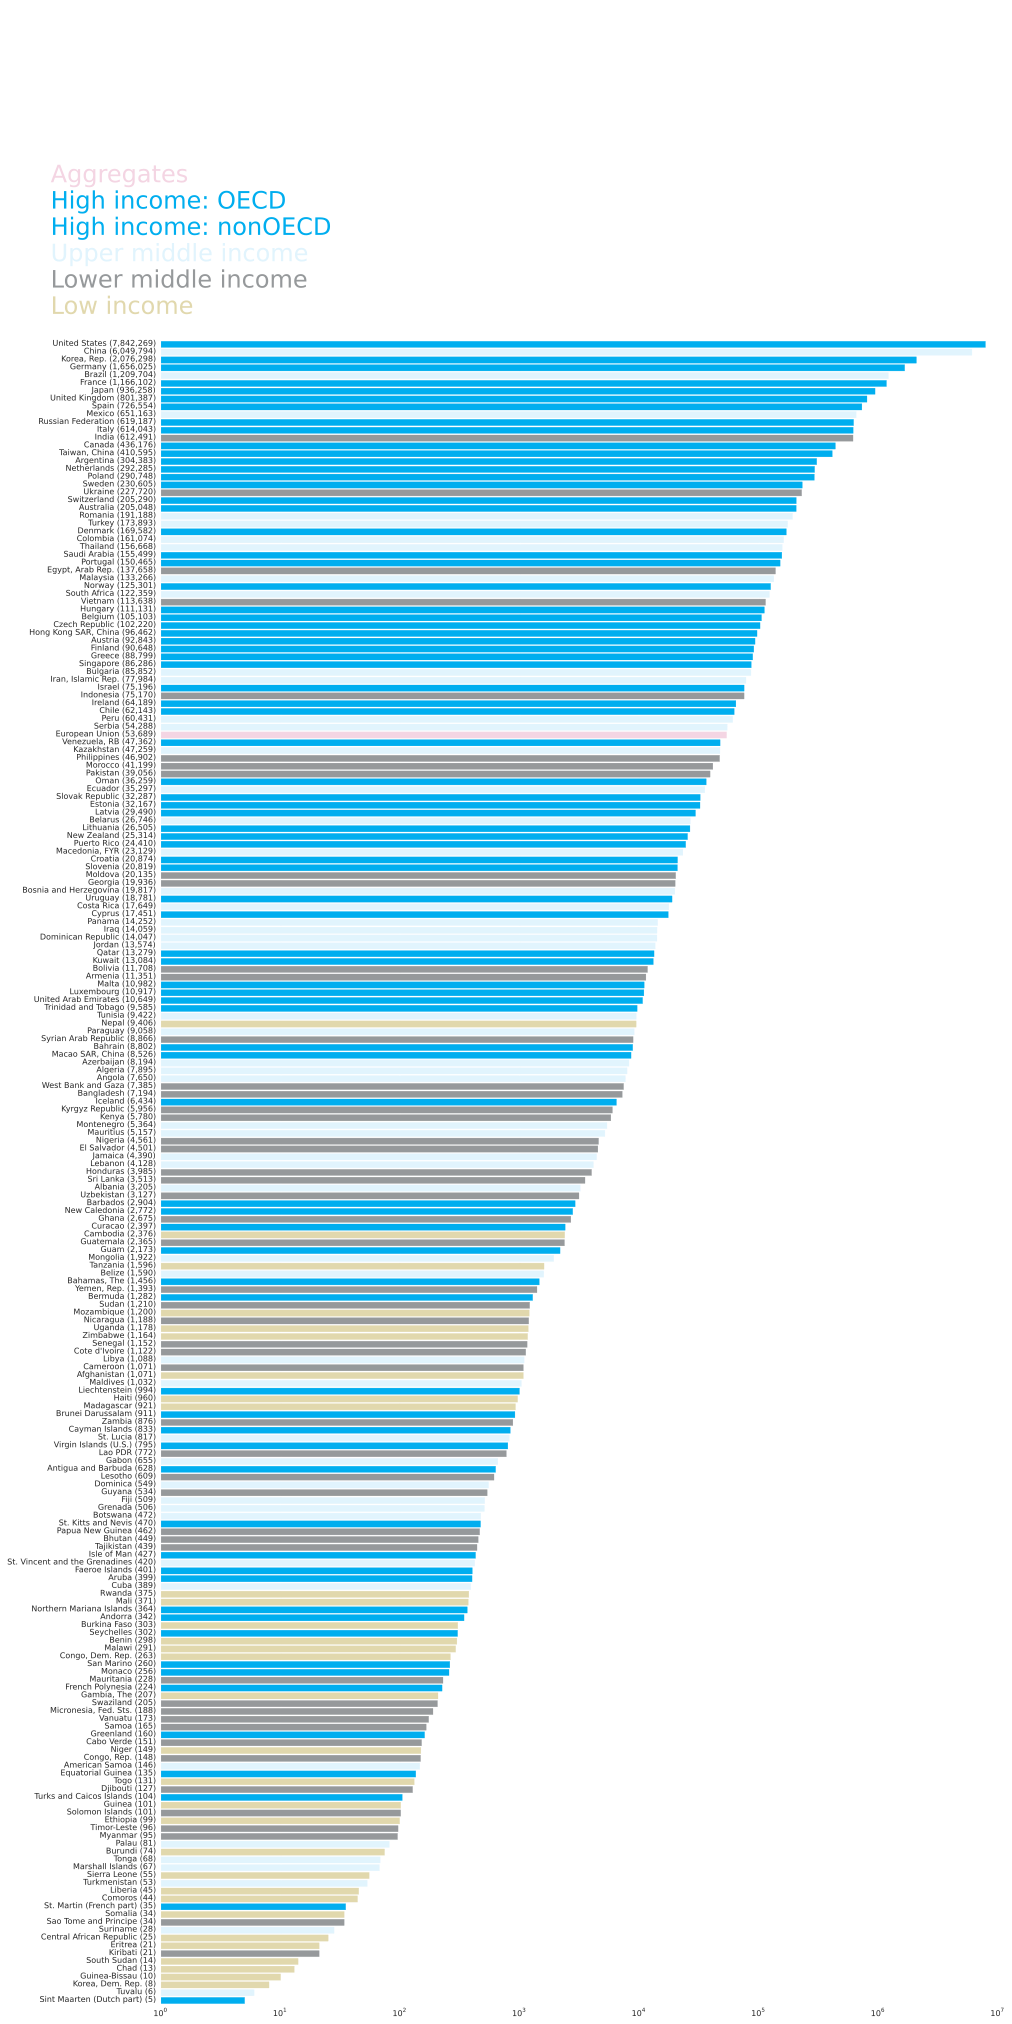

In [24]:
setFigSize(dim=(15,35))
barList=plt.barh(range(len(counts)),counts.values[::-1],0.8,log=True)
trash=plt.yticks([r+0.5 for r in range(len(counts))],[c+' ('+replaceThousands(countsHash[c])+')' for n,c in enumerate(counts.index[::-1])])

for n,bar in enumerate(barList):
    bar.set_color(colourHash[levelHash[counts.index[::-1][n]]])
    print counts.index[::-1][n],levelHash[counts.index[::-1][n]]
#sys.exit(1)
for n,(k,v) in enumerate(colourHash.items()):
    print k,v
    plt.annotate(k,xy=(0.05,0.91-(n*0.013)),xycoords='figure fraction',fontsize=24,color=v)
#plt.annotate('TEST',xy=(0.05,0.87),xycoords='figure fraction',fontsize=60,color=gp_colours.gpBlue)
plt.savefig('../charts/as_count.png',dpi=200)

In [43]:
edgeFile=csv.reader(open('../data/midar-iff.links'),delimiter=' ')

In [26]:
!sed -n 1530,1540p ../data/midar-iff.links

link L1:  N8888118:1.0.0.1 N120707 N120708 
link L2:  N8888119:1.0.0.2 N120709 N120710 N106378 N120711 N120712 
link L3:  N8888120:1.0.0.6 N106378 N120711 
link L4:  N8888121:1.0.0.13 N120713 
link L5:  N8888122:1.0.0.164 N120714 
link L6:  N8888123:1.0.4.10 N120715 
link L7:  N8888124:1.0.8.250 N120716 N120717 
link L8:  N8888125:1.0.20.46 N120718 
link L9:  N120718:1.0.24.22 N120719 
link L10:  N8888126:1.0.24.150 N120720 
link L11:  N699985:1.1.0.1 N120721 N120722 


In [56]:
edgeCounter=collections.Counter()
ipCounter=collections.Counter()

for line in edgeFile:
    if not re.search(r'#',line[0]):
#        print line
        source=line[3].partition(':')[0]
#        print source
#        print nodeGeoHash.get(source)
#        print line[4:-1]
        
        for dest in line[4:-1]:
            edgeCounter[(nodeGeoHash.get(source),nodeGeoHash.get(dest))]+=1

        ipCounter[source]+=1
        # Count number of IPs associated with each AS
        
#        sys.exit(1)

In [54]:
for k,v in edgeCounter.most_common():
    if not k[0]==k[1] and k[0] and k[1]:
        print k,v

('US', 'EG') 71707
('US', 'EU') 29796
('US', 'DE') 28630
('DE', 'US') 25837
('ES', 'PE') 18148
('CA', 'US') 16871
('EU', 'DE') 14785
('SE', 'NO') 14190
('GB', 'US') 14071
('BR', 'US') 13912
('US', 'CA') 12679
('US', 'AU') 11041
('DE', 'EU') 10549
('US', 'GB') 10487
('US', 'BR') 10244
('NO', 'SE') 9760
('US', 'JP') 9749
('US', 'NL') 8937
('NL', 'US') 8776
('EG', 'US') 8458
('GB', 'DE') 8341
('US', 'IN') 8319
('EU', 'US') 7772
('IN', 'US') 7612
('AR', 'US') 7280
('DK', 'US') 7198
('RU', 'US') 7115
('DE', 'GB') 7093
('NL', 'SE') 6890
('FR', 'US') 6434
('RU', 'DE') 6091
('MX', 'US') 6002
('IT', 'US') 5708
('US', 'AR') 5239
('US', 'SG') 5191
('FR', 'DE') 4902
('EU', 'GB') 4803
('DE', 'NL') 4695
('JP', 'US') 4541
('HR', 'SE') 4317
('SE', 'US') 4258
('US', 'TH') 4230
('RU', 'GB') 4198
('LT', 'SE') 4142
('DE', 'FR') 4046
('HK', 'US') 4019
('DK', 'DE') 3953
('GB', 'EU') 3827
('SE', 'NL') 3513
('BR', 'ES') 3486
('CR', 'US') 3442
('FR', 'GB') 3411
('US', 'RU') 3406
('US', 'MX') 3211
('GB', 'NL') 

In [28]:
!head ../data/midar-iff.links

# version: $Id: kapar.cc,v 1.162 2012/03/14 00:24:54 kkeys Exp $
# version: $Id: PathLoader.cc,v 1.19 2012/01/04 20:44:46 kkeys Exp $
# start time: 1367051656 (2013-04-27 01:34:16 PDT)
# command line: /home/kkeys/WIP/topology/archipelago/aliasResolution/midar/../kapar/kapar -il -py -r31 -sir -c0.5 -nv -adms -d1 -mn -lb -1a -oals -O /scratch/alias-resolution/run-20130422/kapar/midar-iff -z 24
#   -B /scratch/alias-resolution/run-20130422/bogon-bn-agg-20130422.txt
#   -A /scratch/alias-resolution/run-20130422/kapar/midar-iff.pairs
#   -P /san5/topology/ark/data/team-probing/list-7.allpref24/team-1/daily/2013/cycle-20130407/daily.l7.t1.c002462.20130407.ams3-nl.warts.gz
#   -P /san5/topology/ark/data/team-probing/list-7.allpref24/team-1/daily/2013/cycle-20130407/daily.l7.t1.c002462.20130407.amw-us.warts.gz
#   -P /san5/topology/ark/data/team-probing/list-7.allpref24/team-1/daily/2013/cycle-20130407/daily.l7.t1.c002462.20130407.bcn-es.warts.gz
#   -P /san5/topology/ark/data/team-probing/lis

In [70]:
nodesDf=pd.read_csv('../data/midar-iff.nodes_count',delimiter='  ',header=False,names=['id','n'])

In [71]:
nodesDf.head()

,id,n
0,N2,697
1,N3,681
2,N4,630
3,N5,548
4,N6,359


In [72]:
nodesDf['country']=nodesDf['id'].apply(lambda x:nodeGeoHash.get(x))

In [73]:
nodesDf.head()

,id,n,country
0,N2,697,SG
1,N3,681,SG
2,N4,630,SG
3,N5,548,IL
4,N6,359,FR


In [78]:
groups=nodesDf.groupby('country')

In [84]:
aggregated=groups.agg(np.sum)

In [86]:
aggregated.head()

,n
country,
A1,11397
A2,9724
AD,1026
AE,32211
AF,3220


In [88]:
aggregated.sort('n',ascending=False)

,n
country,
US,23600900
CN,18204066
KR,6239463
DE,4978297
BR,3633394
FR,3503206
JP,2819883
GB,2417173
ES,2182683
